In [1]:

import nltk
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from IPython import display
import praw


#what is my project. Im going to create a tracker that tells me the most controversial topics in real time
reddit = praw.Reddit (
    client_id="x6kDfhzIfzBSEH9nhGf-Hw",
    client_secret="krBRoDQYgOYkHITZDGM41PYMHqlMwg",
     user_agent="Scraper 1.0 by /u/WillCCUBC" )

sns.set(style='darkgrid',context='talk',palette="Dark2")

headlines = set()
set_of_comments=set()
counter=0
comment_counter=0
for submission in reddit.subreddit('ubc').controversial(limit=None):
    if  1609488000 <submission.created_utc<1641024000  :
        counter=counter+1
        headlines.add(submission.title)
        headlines.add(submission.selftext)
    #for comment in submission.comments:
        #comment_counter=comment_counter+1
        #print(comment_counter)
        #print(comment.body.encode("utf-8", errors='ignore'))
        #headlines.add(comment.body.encode(errors='ignore'))
print("total posts:",counter)    
print(len(headlines))  
#headlines.add("I LOVE UBC FOREVER")## Token positive comment
df = pd.DataFrame(headlines)
#df.to_csv('headlines.csv',header=False,index=False)

df.head()
#df.to_csv('headlines.txt',header=False,encoding='utf-8',index=False)
#df = pd.DataFrame(set_of_comments)
#df.to_csv('comments.txt',header=False,encoding='utf-8',index=False)




total posts: 237
430


,0
0,
1,Do y’all know or maybe are guessing if maybe i...
2,Is it possible to graduate in 3 years?
3,For context I'm a US/Canadian dual citizen but...
4,Can't wait to do a group exam portion tomorrow...


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#nltk.download('vader_lexicon')

sia= SIA()
results =[]
for line in headlines:
    scores =sia.polarity_scores(line)
    scores['headline']=line
    results.append(scores)

pprint(results[:3],width=100)


[{'compound': 0.0, 'headline': '', 'neg': 0.0, 'neu': 0.0, 'pos': 0.0},
 {'compound': 0.4012,
  'headline': 'Do y’all know or maybe are guessing if maybe it’ll be hybrid as in maybe classes '
              'that are a certain Maximum (ex. Less than a 100) number? Or if BC reaches the 75% '
              'of the population vaccinated goal, would they maybe just do all live lecs?',
  'neg': 0.0,
  'neu': 0.897,
  'pos': 0.103},
 {'compound': 0.0,
  'headline': 'Is it possible to graduate in 3 years?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [3]:
df=pd.DataFrame.from_records(results)
df.head()
df.to_csv('results.csv',header=False,encoding='utf-8',index=False)

df['label']=0
df.loc[df['compound']>0.2,'label']=1
df.loc[df['compound']<-0.2,'label']=-1
df.head()


,neg,neu,pos,compound,headline,label
0,0.000,0.000,0.000,0.0000,,0
1,0.000,0.897,0.103,0.4012,Do y’all know or maybe are guessing if maybe i...,1
2,0.000,1.000,0.000,0.0000,Is it possible to graduate in 3 years?,0
3,0.025,0.845,0.129,0.9777,For context I'm a US/Canadian dual citizen but...,1
4,0.000,1.000,0.000,0.0000,Can't wait to do a group exam portion tomorrow...,0


In [4]:


df.to_csv('After_Label_results.csv',header=False,encoding='utf-8',index=False)

df2=df[['headline','label']]
df2.to_csv('reddit_headlines_labels.csv',encoding='utf-8',index=False)
df.label.value_counts()

 0    187
 1    166
-1     77
Name: label, dtype: int64

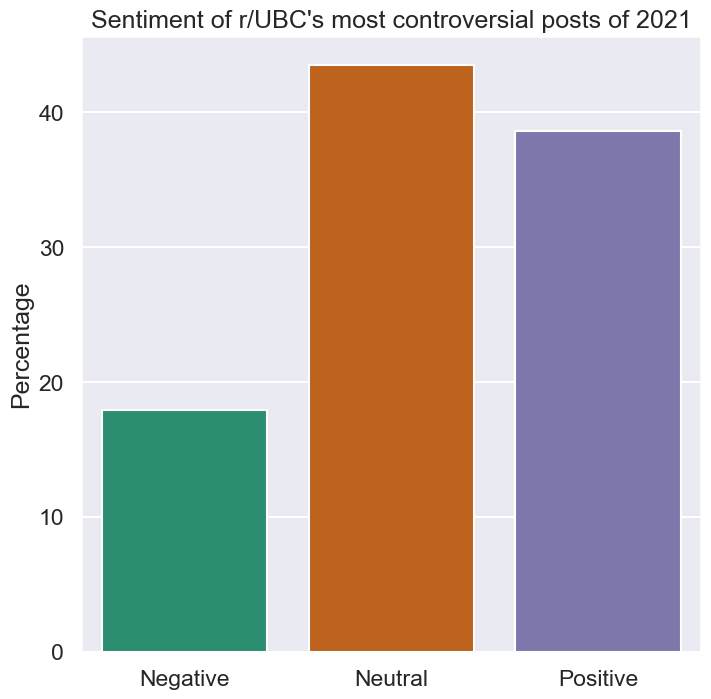

In [6]:

temp=df.label.value_counts(normalize=True)*100
temp.to_csv('Temp_results.csv',header=False,encoding='utf-8',index=False)

fig, ax=plt.subplots(figsize=(8,8))
counts=df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("Percentage")
plt.title("Sentiment of r/UBC's most controversial posts of 2021")
plt.show()
